## display the train loss and  F1 score of bert model 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

def mean_seq(seq,k=100*64):
    result = []
    length = len(seq)//k
    for i in range(length-1):
        result.append(1.0*sum(seq[i*k:(i+1)*k])/k)
    return result

In [2]:
input ="../../model/bert_eleven/bert_eleven_train_info.pkl"
k =100*64
step =20000
file = open(input,"rb")
data = pickle.load(file)

[1 2 3 4 5 6 7 8]
[0.34296567 0.34266714 0.3453947  0.37353646 0.43199899 0.47968365
 0.53921625 0.56392781]
[0.79336907 0.80579984 0.81092506 0.80669707 0.80593241 0.80285321
 0.80037866 0.80976873]
[0.88047731 0.88542509 0.88665395 0.88642758 0.88717136 0.88374349
 0.88241762 0.88949973]
[0.87858363 0.88196234 0.88676658 0.88611749 0.88620538 0.88314031
 0.88094919 0.88757817]


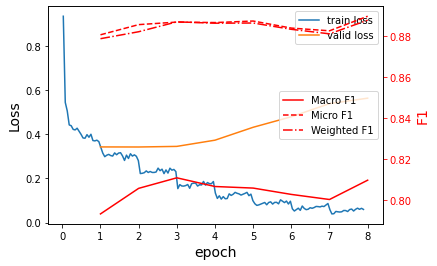

In [3]:
print(np.array(data["valid_epoch"]))
print(np.array(data["valid_loss"]))
print(np.array(data["valid_macro_f1"]))
print(np.array(data["valid_micro_f1"]))
print(np.array(data["valid_weighted_f1"]))

# draw the loss and lr
loss_fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mean_seq(data["train_epoch"],k),mean_seq(data["train_loss"],k),label="train loss")
ax1.plot(data["valid_epoch"],data["valid_loss"],label="valid loss")
ax1.legend()
ax1.set_xlabel('epoch',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
#ax1.tick_params(colors="blue")
ax2.plot(data["valid_epoch"],data["valid_macro_f1"],'r',label="Macro F1")
ax2.plot(data["valid_epoch"],data["valid_micro_f1"],'r--',label="Micro F1")
ax2.plot(data["valid_epoch"],data["valid_weighted_f1"],'r-.',label="Weighted F1")
ax2.set_ylabel('F1', color='red',fontsize=14)
ax2.legend()
#ax2.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax2.tick_params(colors="red")
plt.savefig("train_info.pdf")
